Mounting The drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np


**Reading File and Visualisation**

In [3]:
airplane=pd.read_csv('/content/drive/My Drive/AirplaneAccident.csv')

In [4]:
airplane.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.49920,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.22852,2,0.176883,9054


In [5]:
class_label=airplane['Severity'].value_counts()
total=len(airplane)
print('Highly_Fatal_and_Damaging=',class_label.values[0]/total)
print('Significant_Damage_Ana_Significant_Injuries=',class_label.values[1]/total)
print('Minor_Damage_And_Injuries=',class_label.values[2]/total)
print('Significant_Damage_And_Fatalities=',class_label.values[3]/total)

Highly_Fatal_and_Damaging= 0.3049
Significant_Damage_Ana_Significant_Injuries= 0.2729
Minor_Damage_And_Injuries= 0.2527
Significant_Damage_And_Fatalities= 0.1695


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Visualising every Feature against Severity Score

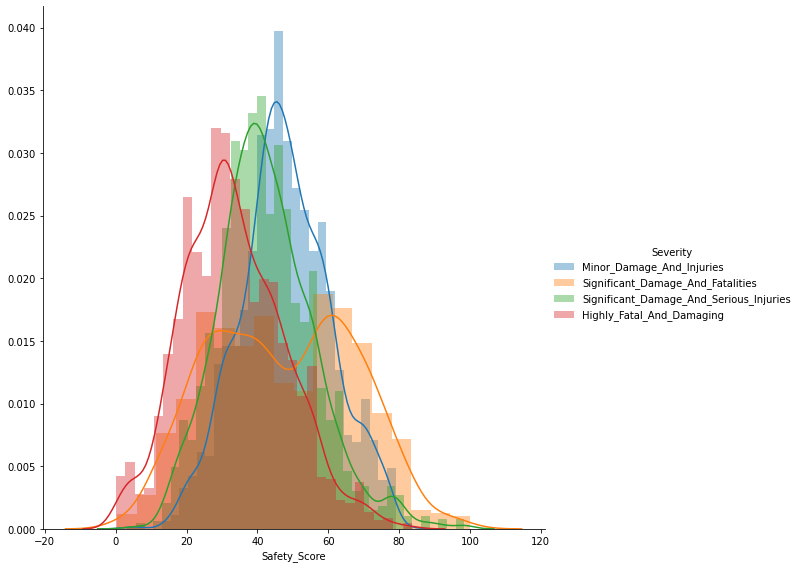

In [7]:
sns.FacetGrid(airplane,hue='Severity',height=8).map(sns.distplot,'Safety_Score').add_legend()

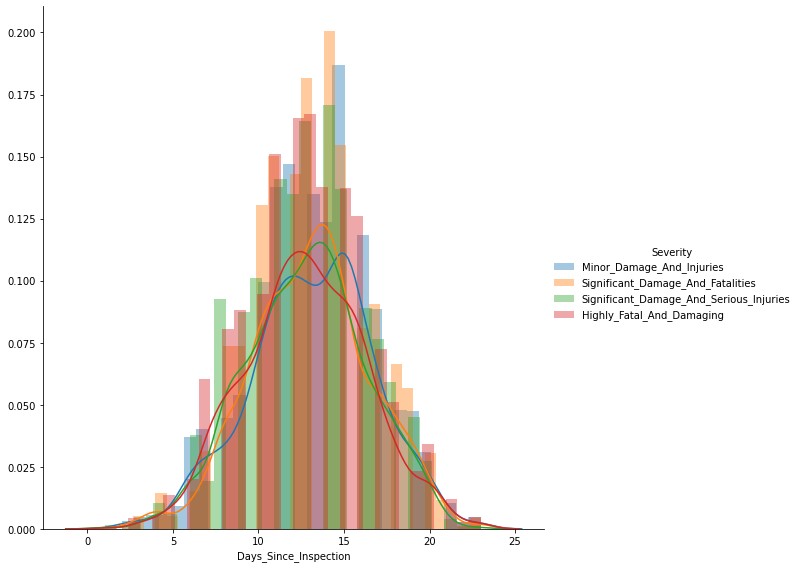

In [8]:
sns.FacetGrid(airplane,hue='Severity',height=8).map(sns.distplot,'Days_Since_Inspection').add_legend()

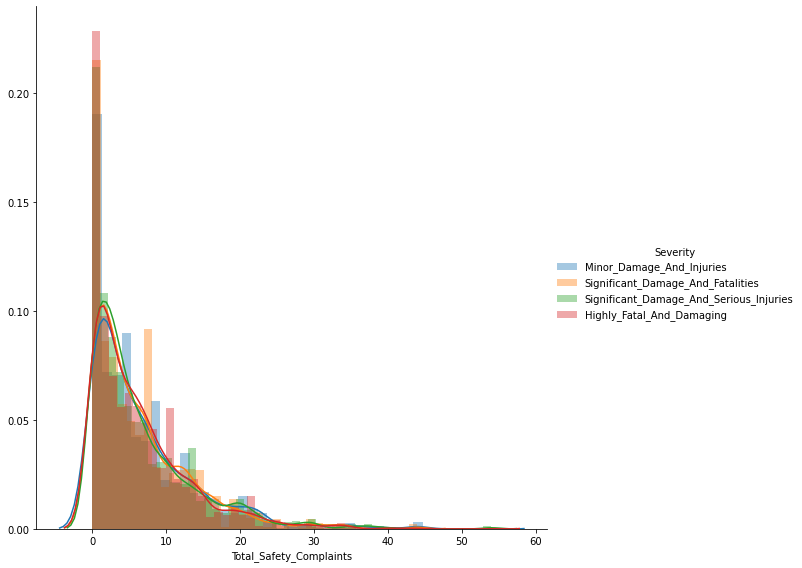

In [9]:
sns.FacetGrid(airplane,hue='Severity',height=8).map(sns.distplot,'Total_Safety_Complaints').add_legend()

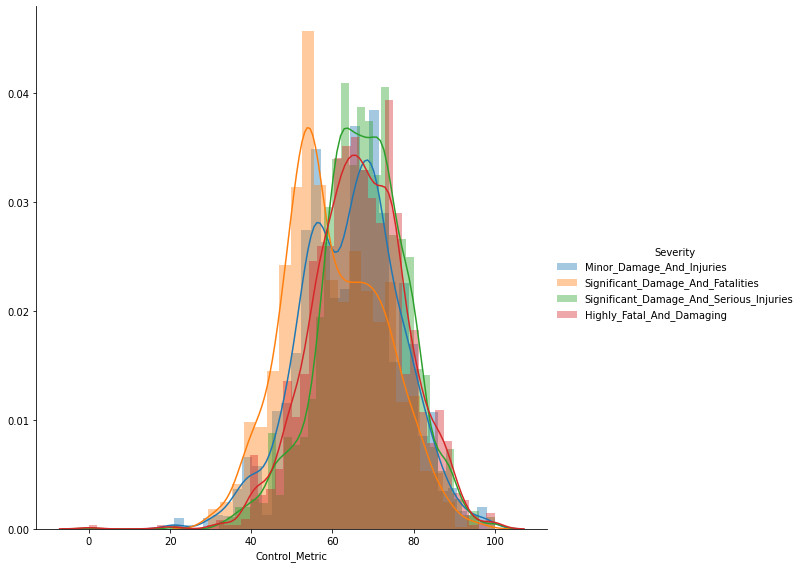

In [10]:
sns.FacetGrid(airplane,hue='Severity',height=8).map(sns.distplot,'Control_Metric').add_legend()

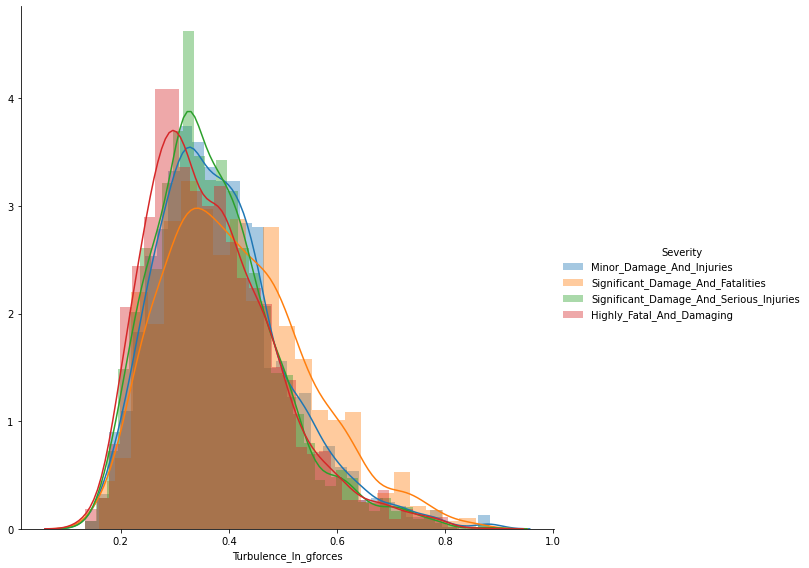

In [11]:
sns.FacetGrid(airplane,hue='Severity',height=8).map(sns.distplot,'Turbulence_In_gforces').add_legend()

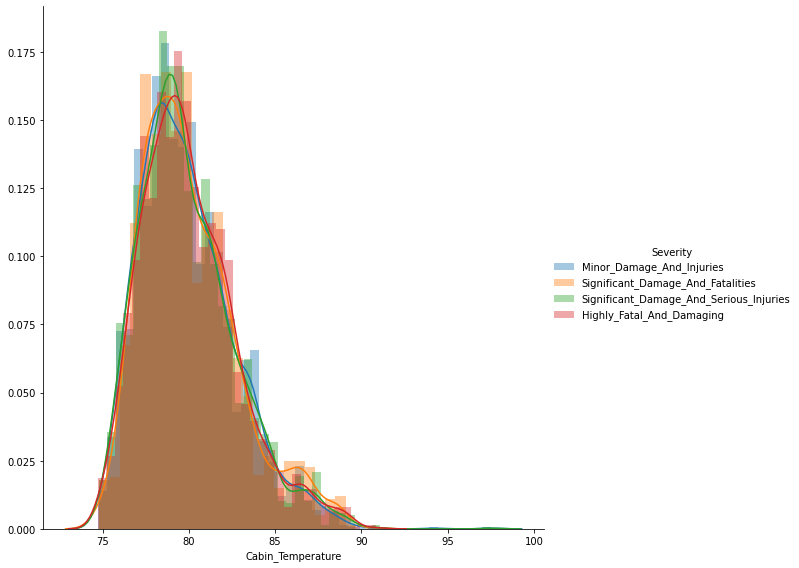

In [12]:
sns.FacetGrid(airplane,hue='Severity',height=8).map(sns.distplot,'Cabin_Temperature').add_legend()

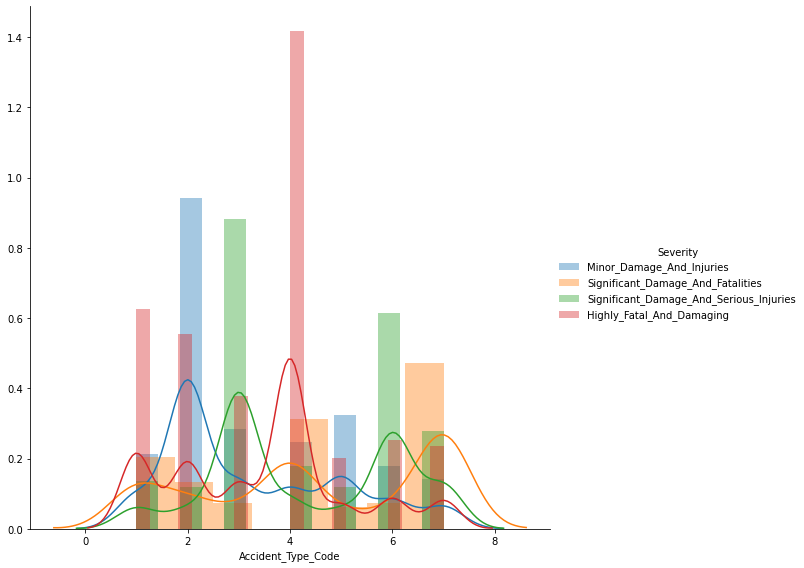

In [13]:
sns.FacetGrid(airplane,hue='Severity',height=8).map(sns.distplot,'Accident_Type_Code').add_legend()

Converting Accident_Type_Code to one-hot-encoding to improve the model

In [14]:
a_t_c=pd.get_dummies(airplane['Accident_Type_Code'],prefix='Ac_Type')
a_t_c.head()

,Ac_Type_1,Ac_Type_2,Ac_Type_3,Ac_Type_4,Ac_Type_5,Ac_Type_6,Ac_Type_7
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [15]:
b=[airplane,a_t_c]
airplane=pd.concat(b,axis=1)
airplane.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID,Ac_Type_1,Ac_Type_2,Ac_Type_3,Ac_Type_4,Ac_Type_5,Ac_Type_6,Ac_Type_7
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352,7570,0,1,0,0,0,0,0
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350,12128,0,1,0,0,0,0,0
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364,2181,0,0,0,0,0,0,1
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.49920,1,0.211728,5946,0,0,1,0,0,0,0
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.22852,2,0.176883,9054,0,0,1,0,0,0,0


In [16]:
airplane=airplane.drop(['Accident_Type_Code'],axis=1)
airplane.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID,Ac_Type_1,Ac_Type_2,Ac_Type_3,Ac_Type_4,Ac_Type_5,Ac_Type_6,Ac_Type_7
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,31335.47682,3,0.424352,7570,0,1,0,0,0,0,0
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,26024.71106,2,0.352350,12128,0,1,0,0,0,0,0
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,39269.05393,3,0.003364,2181,0,0,0,0,0,0,1
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,42771.49920,1,0.211728,5946,0,0,1,0,0,0,0
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,35509.22852,2,0.176883,9054,0,0,1,0,0,0,0


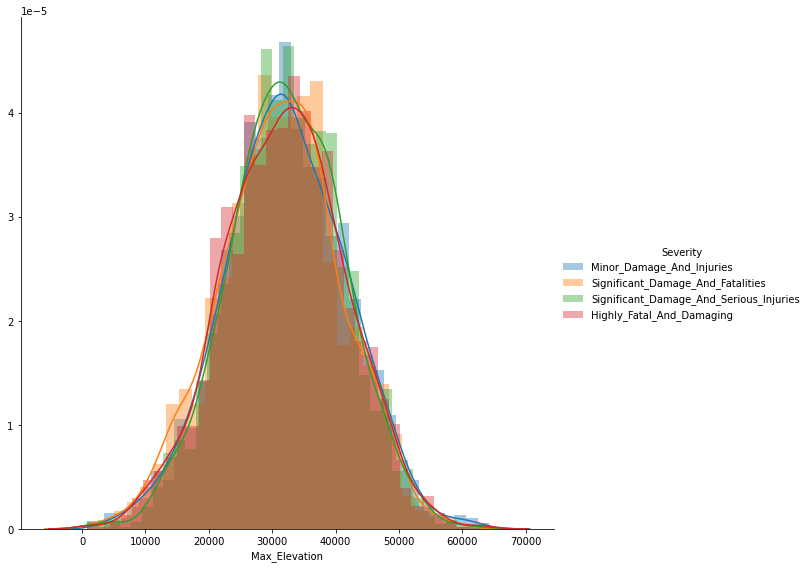

In [17]:
sns.FacetGrid(airplane,hue='Severity',height=8).map(sns.distplot,'Max_Elevation').add_legend()

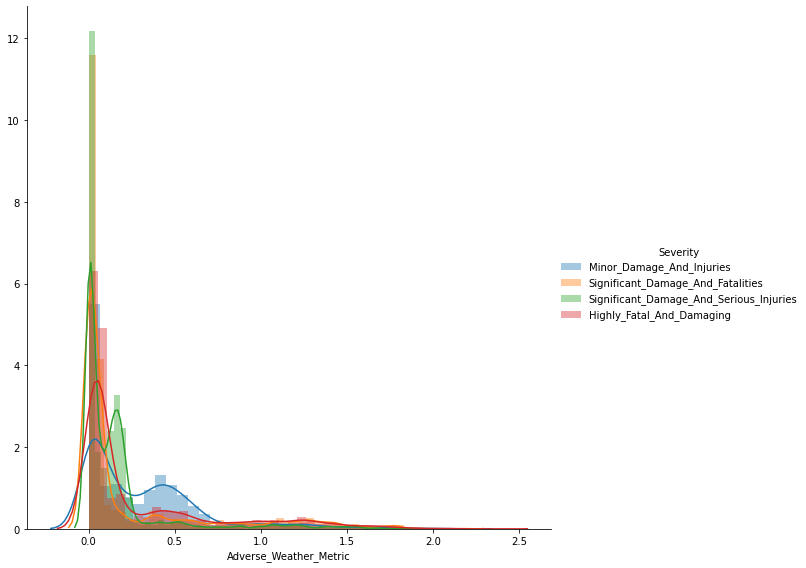

In [18]:
sns.FacetGrid(airplane,hue='Severity',height=8).map(sns.distplot,'Adverse_Weather_Metric').add_legend()

Train Test Split And data pre-processing

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
y=airplane['Severity']
x=airplane.drop(['Severity','Accident_ID'],axis=1)
x.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Max_Elevation,Violations,Adverse_Weather_Metric,Ac_Type_1,Ac_Type_2,Ac_Type_3,Ac_Type_4,Ac_Type_5,Ac_Type_6,Ac_Type_7
0,49.223744,14,22,71.285324,0.272118,78.04,31335.47682,3,0.424352,0,1,0,0,0,0,0
1,62.465753,10,27,72.288058,0.423939,84.54,26024.71106,2,0.352350,0,1,0,0,0,0,0
2,63.059361,13,16,66.362808,0.322604,78.86,39269.05393,3,0.003364,0,0,0,0,0,0,1
3,48.082192,11,9,74.703737,0.337029,81.79,42771.49920,1,0.211728,0,0,1,0,0,0,0
4,26.484018,13,25,47.948952,0.541140,77.16,35509.22852,2,0.176883,0,0,1,0,0,0,0


In [22]:
y.head()

0                  Minor_Damage_And_Injuries
1                  Minor_Damage_And_Injuries
2          Significant_Damage_And_Fatalities
3    Significant_Damage_And_Serious_Injuries
4          Significant_Damage_And_Fatalities
Name: Severity, dtype: object

In [23]:
y=y.map({'Highly_Fatal_And_Damaging':4,'Significant_Damage_And_Fatalities':3,'Significant_Damage_And_Serious_Injuries':2,'Minor_Damage_And_Injuries':1})

In [24]:
y.head()

0    1
1    1
2    3
3    2
4    3
Name: Severity, dtype: int64

Normalising Data

In [25]:
scaler=StandardScaler()
scaler.fit_transform(x)

array([[ 0.45530256,  0.30198105,  2.2140724 , ..., -0.28227719,
        -0.37189236, -0.3824437 ],
       [ 1.2758883 , -0.82808182,  2.93126449, ..., -0.28227719,
        -0.37189236, -0.3824437 ],
       [ 1.31267317,  0.01946533,  1.35344189, ..., -0.28227719,
        -0.37189236,  2.61476397],
       ...,
       [-0.86895304,  1.1495282 , -0.79813439, ..., -0.28227719,
        -0.37189236, -0.3824437 ],
       [ 0.88823228, -1.39311325, -0.94157281, ...,  3.54261704,
        -0.37189236, -0.3824437 ],
       [ 0.50340586,  0.01946533, -0.51125756, ...,  3.54261704,
        -0.37189236, -0.3824437 ]])

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

Logistic regression

In [27]:
logreg=LogisticRegression(max_iter=2000)
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred=logreg.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.6045


Using Navie Bayes to improve results 

In [29]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [30]:
y_pred=gnb.predict(x_test)


Accuracy Decreased 
Lets Try something else

In [31]:
print(metrics.accuracy_score(y_test,y_pred))

0.566


Using Random Forest (Forest of Decision trees)

In [32]:
rf=RandomForestClassifier(criterion='entropy',max_features=8,n_estimators=1000)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
y_pred=rf.predict(x_test)
print('ACCURACY=',metrics.accuracy_score(y_test,y_pred))

ACCURACY= 0.9475


Accuracy Increased

**CLASSIFICATION REPORT**

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.93      0.96      0.94       493
           2       0.96      0.94      0.95       575
           3       0.94      0.95      0.94       312
           4       0.95      0.95      0.95       620

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

